# Assignment 8

### Data Analytics 2

1. Implement logistic regression using Python/R to perform classification on `Social_Network_Ads.csv` dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64


<Axes: ylabel='Age'>

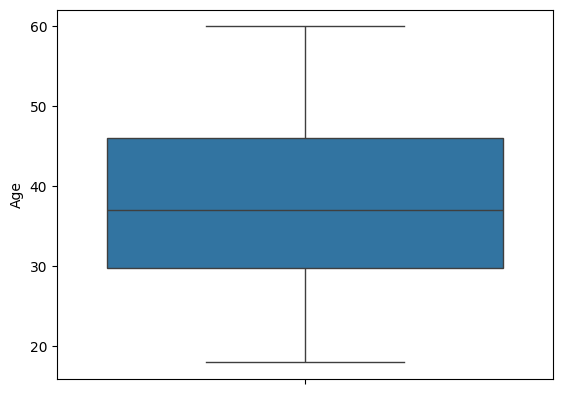

In [6]:
print(df["Age"].describe())
sns.boxplot(data=df["Age"])

## Encoding

In [7]:
df.loc[ df["Gender"] == "Male", "Gender"] = 0
df.loc[ df["Gender"] == "Female", "Gender"] = 1
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [8]:
# Drop user ID as it is unique for each user
df.drop(["User ID"], axis=1, inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [10]:
def min_max_normalize( feature ):
    df[ feature ] = ( df[feature] - df[feature].min() ) / ( df[feature].max() - df[feature].min() ) 

min_max_normalize("EstimatedSalary")
min_max_normalize("Age")

## Test Train Split

In [12]:
from sklearn.model_selection import train_test_split

X = np.asarray(df.drop(["Purchased"], axis=1))
y = np.asarray(df["Purchased"])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [16]:
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8333333333333334

## Metrics

In [20]:
tp = ((y_pred == 0) & (y_test == 0)).sum()
fp = ((y_pred == 0) & (y_test == 1)).sum()
tn = ((y_pred == 1) & (y_test == 1)).sum()
fn = ((y_pred == 1) & (y_test == 0)).sum()

In [21]:
recall = tp/(tp + fn)
accuracy = (tp + tn)/(tp + fp + tn + fn)
precision = tp / (tp + fp)
error = 1 - accuracy
f1 = (2 * recall * precision)/(recall + precision)

In [23]:
print("Recall: ", recall)
print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)

Recall:  0.9875
Precision:  0.8061224489795918
Accuracy:  0.8333333333333334
F1 Score:  0.8876404494382023
